In [1]:
import numpy as np
import math
from scipy import optimize
import scipy.stats as stats
import cap_equi as func

import scipy.stats as stats

# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('seaborn-whitegrid')
mpl.style.use('seaborn')
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# PS2, part 1: Welfare effects of capital injection

The exercise consists of the core setup:
* Two periods, $t=0,1$,
* Two types of agents: Consumers and entrepreneurs. 
* **Consumers:**
    * Linear utility $u_c = c_0^c+c_1^c$.
    * Large endowment of consumption goods in each period: $e$. 
    * Labor endowment of $e_l=1$. Inelastically supplied in a competitive labor market at the price $w_1$.
* **Entrepreneurs:**
    * Linear utility $u_e = c_0^e+c_1^e$.
    * Small endowment $n_0$ in period 0. 
    * Borrow $b_1$, invest in capital $k_1$. 
    * Period 1 they hire labor $l_1$ at wage $w_1$.
    * Entrepreneurs utilize capital and labor in $t=1$ with Cobb-Douglas production function 
    $$ \begin{align} 
    y_1 = k_1^{\alpha}l_1^{1-\alpha} \notag
    \end{align} $$
    * **Entrepreneurs are borrowing constrained:**
    $$\begin{align} 
    b_1\leq \lambda \left(y_1-w_1l_1\right), && \lambda\in (0,1) \notag
    \end{align} $$
* Assume that endowment of consumption goods $(e)$ is *sufficiently* large, for the interest rate to be 1 in equilibrium. (We will show what *sufficiently* means here).

## Q1: Three parts. (i) State the entrepreneur's problem. (ii) Argue that entrepreneurs will choose to maximize profits in period 1, a linear function of $k_1$, and (3) restate entrepreneur's problem as a simple linear problem.

### (i) Entrepreneur problem:

Interpret bullets from **entrepreneurs** above as a problem:

$$
\begin{align}
    \max_{c_0,c_1,k_1,l_1,y_1,b_1} \mbox{ } c_0+c_1,& \notag \\ 
    \text{s.t. }\mbox{ }c_0+k_1 &= n_0+b_1 \notag \\  
                        c_1+b_1 &= y_1-w_1l_1 \tag{Problem 1}\\ 
                            y_1 &= k_1^{\alpha}l_1^{1-\alpha} \notag \\ 
                            b_1\leq &\lambda \left(y_1-w_1l_1\right) \notag
\end{align}$$

States that:
1. Maximize consumption (risk-neutrality).
2. Budget $t=0$: Consumption $(c_0)$ and investment $(k_1)$ equals income from endowment $(n_0)$ and borrowing $(b_1)$.
3. Budget $t=1$: Consumption $(c_1)$ and repayment of debt $(b_1)$ equals income from production $(y_1)$ minues wages $(w_1l_1)$.
4. Production is Cobb-Douglas.
5. Entrepreneur is credit-constrained, with $\lambda$ denoting the degree of future profits that can be used as collateral.

Substitute for $c_0$ and $c_1$ into the utility function, using the budgets for $t=0,1$:

$$\begin{align} 
    c_0+c_1 &= n_0+b_1-k_1+y_1-w_1l_1-b_1 \\ 
            &= n_0+y_1-k_1-w_1l_1 
\end{align}$$

Substitue for $y_1$ using the Cobb-Douglas function (remember you should substitute for $y_1$ in both the object function **and** the constraints). The problem is then reduced to:

$$\begin{align}
    \max_{k_1,l_1,b_1} n_0+k_1^{\alpha}l_1^{1-\alpha}-k_1-w_1l_1, && s.t. b_1\leq \lambda \left(k_1^{\alpha}l_1^{1-\alpha}-w_1l_1\right). \tag{Problem 2}
\end{align}$$ 

The Lagrangian function corresponding to this problem is then given by:

$$\begin{align} 
    \mathcal{L}_2 = n_0+k_1^{\alpha}l_1^{1-\alpha}-k_1-w_1l_1+\mu\left[\lambda\left(k_1^{\alpha}l_1^{1-\alpha}-w_1l_1\right)-b_1\right],
\end{align}$$

where $\mu\geq0$ is the shadow-variable related to the credit-constraint. As in problem set, exercise 3.5 in (JT), this problem is characterized by a set of first order conditions with Karush-Kuhn-Tucker conditions for $\mu$ and the credit constraint. This is because of the inequality constraint (instead of standard Lagrangian approach when the constraint is with "=").


### (ii) Optimal choice of labor:

Note that profits in $t=1$ is given by:

$$\begin{align}
    \pi_1 = k_1^{\alpha}l_1^{1-\alpha}-w_1l_1.
\end{align}$$

Optimal choice of labor $(l^*)$ is then characterized by:

$$\begin{align}
    \dfrac{\partial \mathcal{L}}{\partial l_1} = (1-\alpha)k_1^{\alpha}l_1^{-\alpha} -w_1 + \mu\lambda\left[(1-\alpha)k_1^{\alpha}l_1^{-\alpha}-w_1\right] = 0
\end{align}$$

We can rewrite this condition as:

$$\begin{align}
    \left[(1-\alpha)k_1^{\alpha}l_1^{-\alpha}-w_1\right](1+\mu\lambda)=0 && \Rightarrow && w_1 = (1-\alpha)k_1^{\alpha}l_1^{-\alpha}
\end{align}$$

Note that this corresponds to maximizing $\pi_1$ wrt. labor. Note further that we can use this to write up two other terms:

$$\begin{align} 
w_1l_1^* = (1-\alpha)k_1^{\alpha}(l_1^*)^{1-\alpha}, \tag{Labor Share}
\end{align}$$ 

and by isolating for $l_1$:

$$\begin{align}
    l_1^* = \dfrac{(1-\alpha)^{1/\alpha}k_1}{w_1^{1/\alpha}}. \tag{$l^*$}
\end{align}$$

To show that the profit function is linear in $k_1$, when labor is chosen optimally, start by using (Labor Share):

$$\begin{align}
    \pi_1(l=l^*) &= k_1^{\alpha}(l_1^*)^{1-\alpha}-w_1l_1^* \notag \\
                 &= \alpha k_1^{\alpha}(l_1^*)^{1-\alpha}
\end{align}$$

Now substitute for $(l^*)$:

$$\begin{align}
    \pi_1(l=l^*) &= \alpha k_1^{\alpha}\dfrac{(1-\alpha)^{(1-\alpha)/\alpha}k_1^{1-\alpha}}{w_1^{(1-\alpha)/\alpha}} \notag \\ 
                 &= \underbrace{\dfrac{\alpha (1-\alpha)^{(1-\alpha)/\alpha}}{w_1^{(1-\alpha)/\alpha}}}_{\equiv R(w_1)}k_1 \tag{Profit}
\end{align}$$







### (iii) Restate as linear problem:

Using (Profit) in (Problem 2):

$$\begin{align}
    \max_{k_1,b_1}\mbox{ }n_0-k_1+R(w_1)k_1, && \text{s.t. } b_1\leq \lambda R(w_1)k_1 \tag{Problem 3}.
\end{align} $$

## Q2: Derive entrepreneur's demand for capital, and argue how the solution depends on $\lambda$ and $R(w_1)$.

Problem $3$ is linear in $k_1$. Thus capital demand depends on:

* If $R(w_1)<1$: Investment in capital is not profitable, $k_1^*=0$. (it is implicitly assumed that $k\geq0$)
* If $\lambda R(w_1)>1$: Investment in capital is so profitable that borrowing constraint never binds, $k_1^*=\infty$.
* If $\lambda R(w_1)<1<R(w_1)$: Capital is postponed as much as possible, but borrowing constraint will bind. Solution is then to set $c_0=0$ in the budget at $t=0$, and use that $b_1$ is determined by the borrowing constraint:

$$\begin{align} 
    k_1^* &= n_0 +b_1 \\
          &= n_0+\lambda R(w_1)k_1^* \\ 
\Rightarrow k_1^* &= \dfrac{n_0}{1-\lambda R(w_1)}
\end{align}$$

* Finally, if $R(w_1)=1$ the entrepreneur is indifferent between consumption and investment. In this case capital demand is indeterminate:
$$\begin{align}
    k_1^*\in\left[0,\mbox{ }\dfrac{n_0}{1-\lambda}\right].
\end{align}$$

**Illustrating demand for capital, and equilibrium capital**:

Before we proceed to the next questions, let us briefly illustrate how capital demand looks like, and how it behaves in equilibrium.

C:\Users\sxj477\Documents\VisualCode\Teaching\FinancialFrictionsSummer2019\FinancialFrictions2019\PS2\cap_equi.py:11: RuntimeWarning: divide by zero encountered in true_divide
  second = n_0x/(1-lambda_x*R)


NameError: name 'R_grid' is not defined

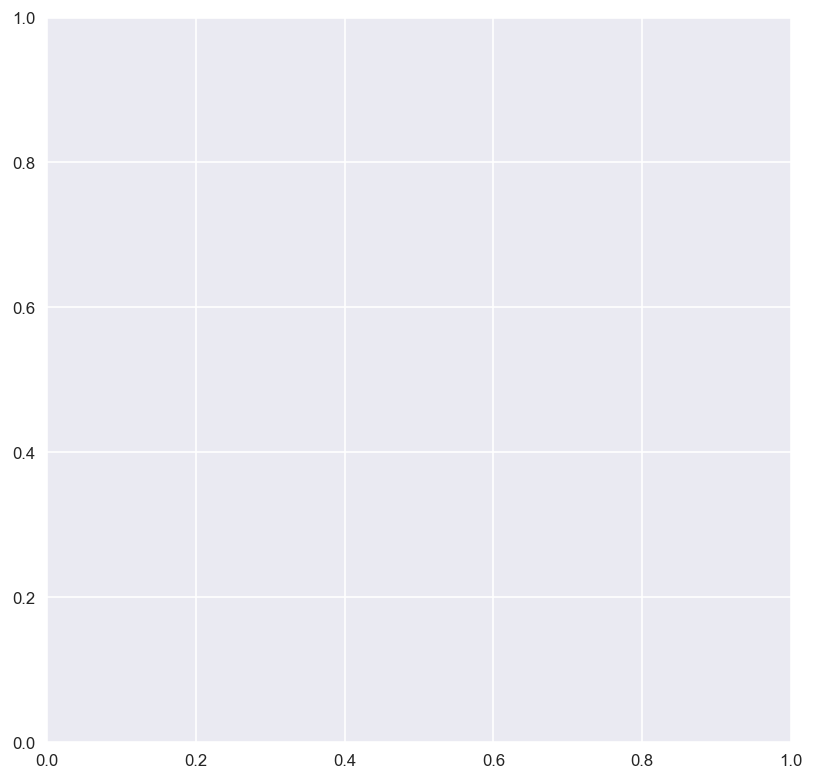

In [2]:
# Exogenous parameters:
n_0 = 1
_lambda = 0.5
alpha = 0.5
# Display 'infinity' with a sufficiently high level, when plotting this:
Inf = 10**5
# Exogenous grid of R:
R_min = 0.1
R_max = 2
N_R = 100
R_grid = np.linspace(R_min, R_max, N_R)

# Change them to:
n_02 = 1.1
_lambda2 = 0.5
alpha2 = 0.5

fig = func.plot_cap(R_grid,N_R,n_0,_lambda,alpha,Inf,n_02,_lambda2,alpha2)


#def capital_demand_upper(R):
#    first = 0*np.ones(N_R)
#    first_u = first[np.where(1>R)]
#    second = n_0/(1-_lambda*R)
#    second_u = second[np.where(np.logical_and(R>=1,_lambda*R<1))]
#    third = Inf*np.ones(N_R)
#    third_u = third[np.where(_lambda*R>=1)]
#    return np.concatenate((first_u,second_u,third_u))

#def capital_demand_lower(R):
#    first = 0*np.ones(N_R)
#   first_l = first[np.where(1>=R)]
#   second = n_0/(1-_lambda*R)
#    second_l = second[np.where(np.logical_and(R>1, _lambda*R<1))]
#    third = Inf*np.ones(N_R)
#    third_l = third[np.where(_lambda*R>=1)]
#    return np.concatenate((first_l,second_l,third_l))

#cd_upper = capital_demand_upper(R_grid)
#cd_lower = capital_demand_lower(R_grid)

#cd_equi = (alpha/R_grid)**(1/(1-alpha))


#fig = plt.figure(frameon=False, figsize=(12,6), dpi=100)
#ax = fig.add_subplot(1,1,1)
#ax.plot(R_grid, cd_upper)
#ax.plot(R_grid, cd_lower, color='red', alpha=0.5)
#ax.plot(R_grid, cd_equi)
#ax.fill_between(R_grid, cd_upper, cd_lower, alpha=0.5)
#ax.set_xlim([0, 2])
#ax.set_ylim([0, 10])
    
# Labels:
#ax.set_xlabel('$R(w_1)$')
#ax.set_ylabel('Capital')

#fig.tight_layout()

## Q3: Show the cutoff $n^*$, where $n_0 \geq n^*$$ implies that the first-best level of capital can be financed, and the borrowing constraint is not binding.

Let us define the first-best level of capital. Recall that in equilibrium $l_1=1$ (as this is the endowment supplied by consumers). Define first-best as **the level of capital that maximizes net output**:

$$\begin{align} 
    \max_{k_1} k_1^{\alpha}-k_1 && \Rightarrow && k_1^{fb} = \alpha^{1/(1-\alpha)}.
\end{align}$$

In equilibrium the interest rate $R(w_1)$ is defined by the marginal product of capital:

$$\begin{align}
    R(w_1) = \alpha k_1^{\alpha-1}, && \Rightarrow && k_1 = \left(\dfrac{\alpha}{R(w_1)}\right)^{1/(1-\alpha)}
\end{align}$$

Thus for $k_1=k_1^{fb}$ we need $R(w_1)=1$. When $R(w_1)=1$ the capital demand was indeterminate, i.e. it covered a range of possible solutions. The optimal level $k_1^{fb}$ is one of the feasible capital demand levels as long as:

$$\begin{align}
k_1^{fb}\equiv \alpha^{1/(1-\alpha)}\in\left[0,\mbox{ }\dfrac{n_0}{1-\lambda}\right]. 
\end{align}$$

As long as $n_0$ is sufficiently large the first best is thus an equilibrium. The threshold $n^*$ where the first best is an equilibrium for $n_0\geq n^*$ is then given by the condition above with equality:

$$\begin{align}
    \alpha^{1/(1-\alpha)} = \dfrac{n^*}{1-\lambda} && \Rightarrow && n^* = (1-\lambda)\alpha^{1/(1-\alpha)} 
\end{align}$$



**Addtional remark:** Give another explanation for why we need R=1 for optimality:

Optimality requires that the $\color{blue}{\text{marginal rate of transformation}}$ equals $\color{blue}{\text{the marginal rate of substitution}}$

## Q4: Show that if n<n* there is an equilibrium where the entrepreneurs are constrained and $k_1$ becomes an increasing function of $n_0$.

* **Capital demand:** Recall that when $n_0$ is relatively small, capital. 